#### Geometric Mean

- is a measure of central tendency that is commonly used when dealing with data that has `multiplicative` relationships or when calculating growth rates. 

- Unlike the arithmetic mean, which is based on addition, the geometric mean is based on multiplication. 

- It is particularly useful for data that is not naturally additive.

The formula for calculating the geometric mean (often denoted as "G" or "GM") of a set of values is as follows:

G = (n√(x1 * x2 * ... * xn))

Where:

- G represents the geometric mean.
- n represents the total number of values in the dataset.
- x1, x2, ..., xn represent the individual values in the dataset.

`Use Case`: Investment returns; measuring compound growth rates over time.

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import math

**Example** - simple GM compute 

In [12]:
# Define a list of positive values
values = [1.05, 1.10, 1.15, 1.20, 1.25]

In [15]:
# Calculate the geometric mean
n = len(values)
product = 1.0  # Initialize the product to 1
for value in values:
    product *= value

geometric_mean = math.pow(product, 1/n)

# Print the result
print("Geometric Mean:", geometric_mean)

Geometric Mean: 1.1478211337169046


Geometric Mean: 1.1478211337169046


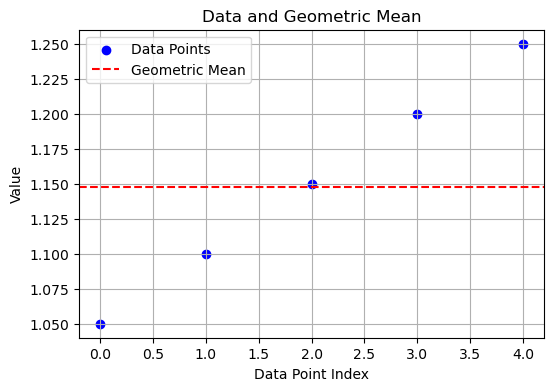

In [16]:
# Plot the data and geometric mean
plt.figure(figsize=(6, 4))
plt.scatter(range(len(values)), values, color='blue', label='Data Points')
plt.axhline(y=geometric_mean, color='red', linestyle='--', label='Geometric Mean')
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.title('Data and Geometric Mean')
plt.legend()
plt.grid(True)

print("Geometric Mean:", geometric_mean)

**Example** - missing value impute

In [19]:
import pandas as pd

In [20]:
# Create a sample dataset with missing values
data = {
    'Year':          [1, 2, 3, 4],
    'Initial_Value': [1000, 1050, np.nan, 1193.09],
    'Interest_Rate': [0.05, 0.06, 0.04, 0.03],
    'Ending_Value':  [1050, 1113, np.nan, np.nan]
}

In [21]:
df = pd.DataFrame(data)

# Sort the DataFrame by 'Year' column
df = df.sort_values('Year')
df

,Year,Initial_Value,Interest_Rate,Ending_Value
0,1,1000.00,0.05,1050.0
1,2,1050.00,0.06,1113.0
2,3,NaN,0.04,NaN
3,4,1193.09,0.03,NaN


In [22]:
# Interpolate missing values while preserving the multiplicative relationship
for col in ['Initial_Value', 'Ending_Value']:
    
    missing_indices = df.index[df[col].isnull()]
    
    for idx in missing_indices:
        current_year = df.loc[idx, 'Year']
        prev_year    = current_year - 1
        next_year    = current_year + 1
        
        if prev_year in df['Year'].values and next_year in df['Year'].values:
            prev_value = df.loc[df['Year'] == prev_year, col].values[0]
            next_value = df.loc[df['Year'] == next_year, col].values[0]
            
            prev_interest_rate = df.loc[df['Year'] == prev_year, 'Interest_Rate'].values[0]
            next_interest_rate = df.loc[df['Year'] == next_year, 'Interest_Rate'].values[0]

            interpolated_value = prev_value * (1 + prev_interest_rate) / (1 + next_interest_rate)
            df.loc[idx, col] = interpolated_value

In [23]:
df

,Year,Initial_Value,Interest_Rate,Ending_Value
0,1,1000.000000,0.05,1050.000000
1,2,1050.000000,0.06,1113.000000
2,3,1080.582524,0.04,1145.417476
3,4,1193.090000,0.03,NaN
